<a href="https://www.kaggle.com/code/evansajumathew/gdp-analysis?scriptVersionId=138283598" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing Panda and Numpy Modules
import pandas as pd
import numpy as np

#Importing Data Visualization Modules
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

#Importing Statistical Modules
import scipy.stats as sts

#Reading the Data from CSV File
df = pd.read_csv('/kaggle/input/country-regional-and-world-gdp/gdp_csv.csv')
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [2]:
df.shape

(11507, 4)

## Checking wether this dataframe contains any null values

In [3]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

## Insight of the dataframe

In [4]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

## List of countries in the dataframe

In [5]:
df['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

## Number of Countries in this dataframe

In [6]:
df['Country Name'].nunique()

256

## Number of Years of data on India's GDP

In [7]:
df[df['Country Name']=='India']['Year'].nunique()

57

## GDP growth Column from 1960 - 2016 of every country

In [8]:
final_gdp = []

for i in df['Country Name'].unique():
    
    batch_gdp = [0]
    temp = df[df['Country Name']==i]
    data_temp = temp.values
    
    
    for j in range(1,len(data_temp)):
        next_year = data_temp[j][3]
        last_year = data_temp[j-1][3]
        batch_gdp.append(round((next_year - last_year) / last_year *100,2))
    temp = temp.assign(GDP = batch_gdp)
    final_gdp.append(temp)

df = pd.concat(final_gdp,axis=0)
df.head(5)

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


## The world GDP in 1969?

In [9]:
temp = df[df['Country Name']=='World']
temp = temp.values
for i in range(0,len(temp)):
    if(temp[i][2]==1969):
        result = temp[i][3]
        break

print(result)

2690797713906.75




## GDP of India

In [10]:
data_india = df[df['Country Name']=='India']
data_india

,Country Name,Country Code,Year,Value,GDP
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
6079,India,IND,1965,5.876042e+10,5.44
6080,India,IND,1966,4.525364e+10,-22.99
6081,India,IND,1967,4.946617e+10,9.31
6082,India,IND,1968,5.237732e+10,5.89
6083,India,IND,1969,5.766833e+10,10.10


### Summary of Data about India

In [11]:
data_india.describe()

,Year,Value,GDP
count,57.000000,5.700000e+01,57.000000
mean,1988.000000,5.093519e+11,7.870351
std,16.598193,6.167624e+11,8.701231
min,1960.000000,3.653593e+10,-22.990000
25%,1974.000000,9.715922e+10,3.730000
50%,1988.000000,2.753114e+11,7.900000
75%,2002.000000,5.080690e+11,12.070000
max,2016.000000,2.263792e+12,30.510000


##  GDP growth of India in Year 1994 (*as compare to 1993)?

In [12]:
data = df.values

In [13]:
G2P =df[df['Country Name']=='India'][df['Year']==1994].values
G1P =df[df['Country Name']=='India'][df['Year']==1993].values

cur_year = G2P[0][3]
prev_year = G1P[0][3] 

GDP_per = round((cur_year - prev_year) / prev_year*100,2)

print('The GDP growth of India at year 1994: ',GDP_per,"%")

The GDP growth of India at year 1994:  17.18 %


/tmp/ipykernel_20/740479627.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_20/740479627.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Data Visualization of India's GDP

<Axes: xlabel='Year', ylabel='GDP'>

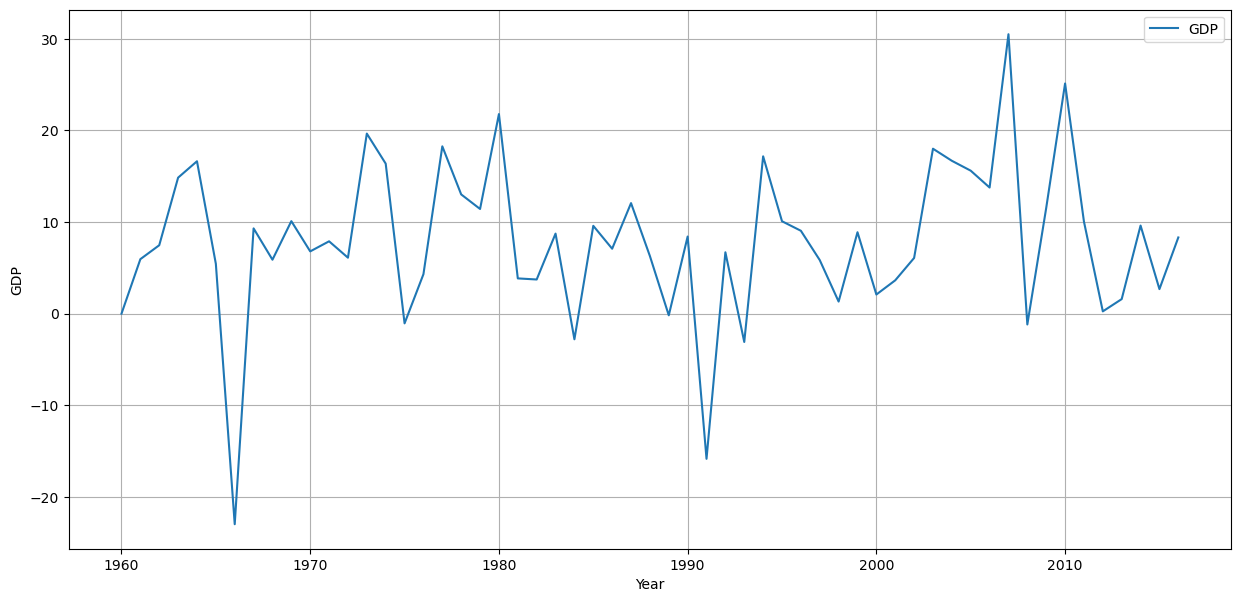

In [14]:
df[df['Country Name']=='India'].plot(kind = 'line',x='Year',y='GDP', figsize = (15,7),grid = True, ylabel = 'GDP')

## Saving the graph as seperate offline file in .html format

In [15]:
fig = px.line(data_india,x = 'Year', y = 'Value',title = 'India GDP Analysis') # This creates Line Graph and stores in 'fig'
pyo.plot(fig,filename = 'India GDP Analysis') # This Line saves the file name 'India GDP Analysis' in current working directory

/opt/conda/lib/python3.10/site-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `India GDP Analysis` didn't end with .html. Adding .html to the end of your file.



'India GDP Analysis.html'

# Bulk saving offline graphs for every country in .html format

In [16]:
import os # Imports Operating System module
os.mkdir('GDP Analysis') # Creates directory/File :  /GDP Analysis

for i in df['Country Name'].unique():
    df_pr = df[df['Country Name']==i]
    fig = px.line(df_pr,x='Year',y='Value',title = i+'Anaylsis')
    pyo.plot(fig,filename = 'GDP Analysis/'+i+'.html',auto_open = False) # Auto open makes sures that newly files are not open for i times on screen

## Comparing GDP of every country

In [17]:
fig = px.line(df,x='Year',y='Value',title = 'GDP Anaylsis of every country',color = 'Country Name')

# Saving the graph as.html file
pyo.plot(fig, filename = 'GDP Analysis of every country.html')

'GDP Analysis of every country.html'

## Comparing GDP of India and China

In [18]:
china_data = df[df['Country Name']=='China']
india_data = df[df['Country Name']=='India']
df_pr = pd.concat([china_data,india_data], axis =0)

fig = px.line(df_pr,x='Year',y='Value',title='CHINA | INDIA GDP ',color = 'Country Name')
pyo.plot(fig,filename='china_india_GDP_anaylsis.html')

'china_india_GDP_anaylsis.html'

## Function to comapre GDP of selected country

In [19]:
def compare_gdp(country_list,file_open):
    temp_list = []
    for i in country_list:
        temp_list.append(df[df['Country Name']==i])
        df_pr = pd.concat(temp_list,axis=0)
        
    fig = px.line(df_pr,x='Year',y='Value',title='GDP Analysis of' + '|'.join(country_list),color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(country_list) +'.html',auto_open = file_open)

In [20]:
# We can enter any country but as a list 
compare_gdp(['India','China'],True)